<a href="https://colab.research.google.com/github/s10955028/bigdata/blob/main/0518.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
install.packages("SportsAnalytics")
install.packages("ggplot2")
library(SportsAnalytics)
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



`geom_smooth()` using formula 'y ~ x'




Call:
lm(formula = TotalPoints ~ TotalMinutesPlayed, data = NBA1819)

Coefficients:
       (Intercept)  TotalMinutesPlayed  
           -83.604               0.535  


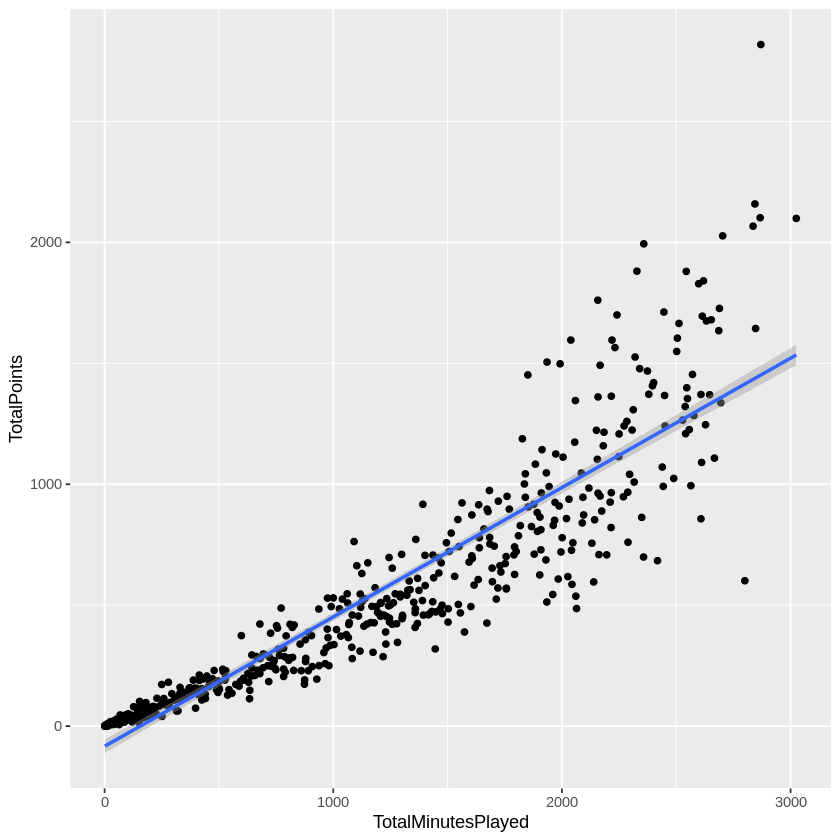

In [3]:
NBA1819<-fetch_NBAPlayerStatistics("18-19")
ggplot(NBA1819,aes(x=TotalMinutesPlayed,y=TotalPoints))+geom_point()+geom_smooth(method = "glm")
lm(TotalPoints~TotalMinutesPlayed,data =NBA1819)

In [5]:
glm(TotalPoints~TotalMinutesPlayed+FieldGoalsAttempted,data =NBA1819)


Call:  glm(formula = TotalPoints ~ TotalMinutesPlayed + FieldGoalsAttempted, 
    data = NBA1819)

Coefficients:
        (Intercept)   TotalMinutesPlayed  FieldGoalsAttempted  
          -14.63025             -0.01014              1.30932  

Degrees of Freedom: 529 Total (i.e. Null);  527 Residual
Null Deviance:	    127200000 
Residual Deviance: 2489000 	AIC: 5993

In [4]:
glm(TotalPoints~TotalMinutesPlayed+FieldGoalsAttempted+Position,
    data =NBA1819)


Call:  glm(formula = TotalPoints ~ TotalMinutesPlayed + FieldGoalsAttempted + 
    Position, data = NBA1819)

Coefficients:
        (Intercept)   TotalMinutesPlayed  FieldGoalsAttempted  
            37.6575              -0.0165               1.3276  
         PositionPF           PositionPG           PositionSF  
           -31.2035             -78.8570             -54.2729  
         PositionSG  
           -76.9879  

Degrees of Freedom: 528 Total (i.e. Null);  522 Residual
  (1 observation deleted due to missingness)
Null Deviance:	    1.27e+08 
Residual Deviance: 2084000 	AIC: 5897

In [6]:
mydata <- read.csv("https://raw.githubusercontent.com/CGUIM-BigDataAnalysis/BigDataCGUIM/master/binary.csv")

In [7]:
head(mydata)

,admit,gre,gpa,rank
,<int>,<int>,<dbl>,<int>
1,0,380,3.61,3
2,1,660,3.67,3
3,1,800,4.00,1
4,1,640,3.19,4
5,0,520,2.93,4
6,1,760,3.00,2


In [8]:
mydata$rank <- factor(mydata$rank)
mylogit <- glm(admit ~ gre + gpa + rank, data = mydata, family = "binomial")
sum<-summary(mylogit)
sum$coefficients

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),-3.989979073,1.139950936,-3.500132,0.0004650273
gre,0.002264426,0.001093998,2.069864,0.0384651284
gpa,0.804037549,0.331819298,2.423119,0.0153878974
rank2,-0.675442928,0.316489661,-2.134171,0.0328288188
rank3,-1.340203916,0.345306418,-3.881202,0.0001039415
rank4,-1.551463677,0.417831633,-3.713131,0.0002047107


In [9]:
install.packages("rpart")
library(rpart)
DT <- rpart(Position~Blocks+ThreesMade+Assists+Steals, data=NBA1819)
DT

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



n=529 (1 observation deleted due to missingness)

node), split, n, loss, yval, (yprob)
      * denotes terminal node

  1) root 529 398 SG (0.14 0.2 0.21 0.2 0.25)  
    2) Blocks>=62.5 41  16 C (0.61 0.34 0 0.049 0)  
      4) ThreesMade< 8.5 18   2 C (0.89 0.11 0 0 0) *
      5) ThreesMade>=8.5 23  11 PF (0.39 0.52 0 0.087 0)  
       10) ThreesMade>=78 9   3 C (0.67 0.11 0 0.22 0) *
       11) ThreesMade< 78 14   3 PF (0.21 0.79 0 0 0) *
    3) Blocks< 62.5 488 357 SG (0.1 0.19 0.23 0.21 0.27)  
      6) Assists>=218 77  29 PG (0.026 0.065 0.62 0.1 0.18) *
      7) Assists< 218 411 294 SG (0.11 0.22 0.15 0.23 0.28)  
       14) ThreesMade< 1.5 87  58 C (0.33 0.29 0.11 0.11 0.15)  
         28) Blocks>=0.5 50  24 C (0.52 0.34 0.06 0.04 0.04) *
         29) Blocks< 0.5 37  26 SG (0.081 0.22 0.19 0.22 0.3) *
       15) ThreesMade>=1.5 324 220 SG (0.056 0.2 0.16 0.26 0.32)  
         30) Blocks>=17.5 117  76 PF (0.085 0.35 0.026 0.32 0.21)  
           60) Steals< 38.5 46  21 PF (0.17 0

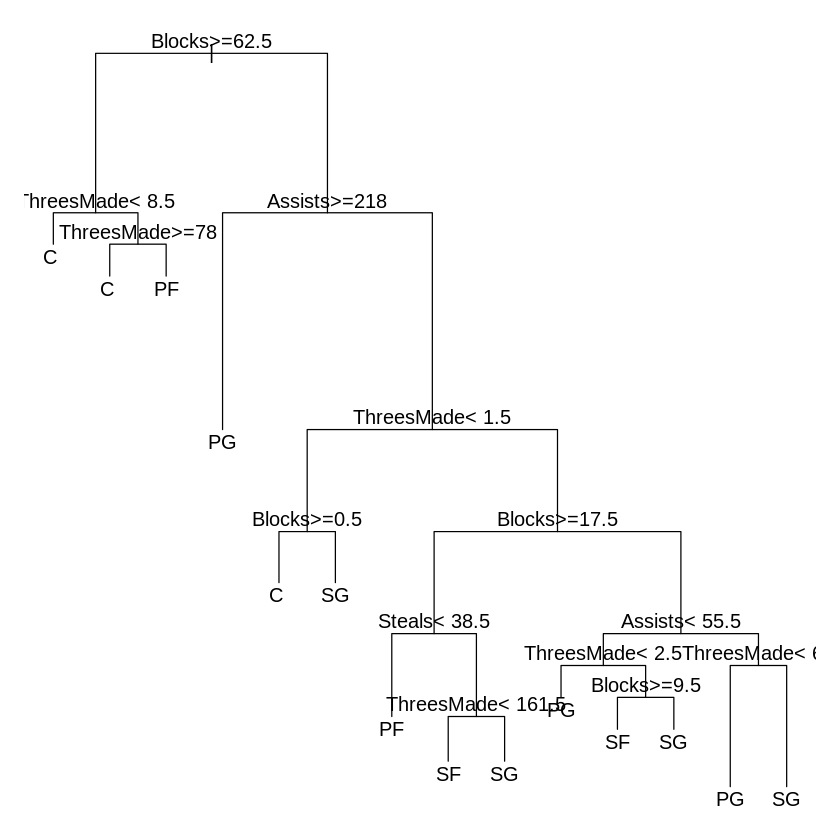

In [10]:
par(mfrow=c(1,1), mar = rep(1,4)) #下,左,上,右
plot(DT)
text(DT, use.n=F, all=F, cex=1)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



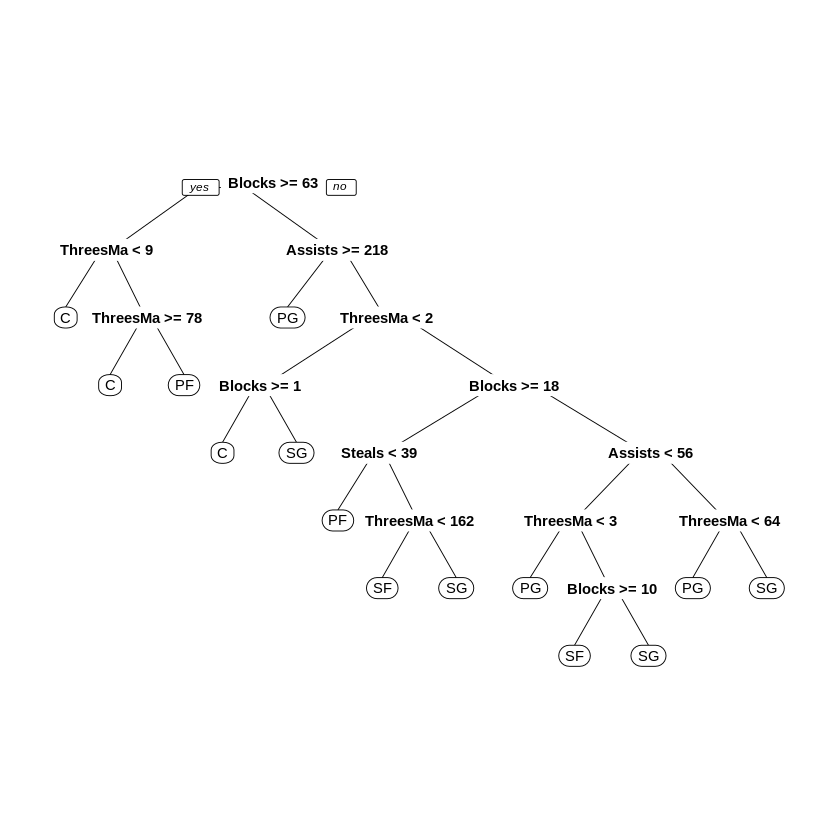

In [11]:
install.packages("rpart.plot")

library(rpart.plot)
prp(DT)	

`geom_smooth()` using formula 'y ~ x'




Call:
lm(formula = TotalPoints ~ TotalMinutesPlayed, data = NBA1920)

Coefficients:
       (Intercept)  TotalMinutesPlayed  
          -70.8163              0.5357  


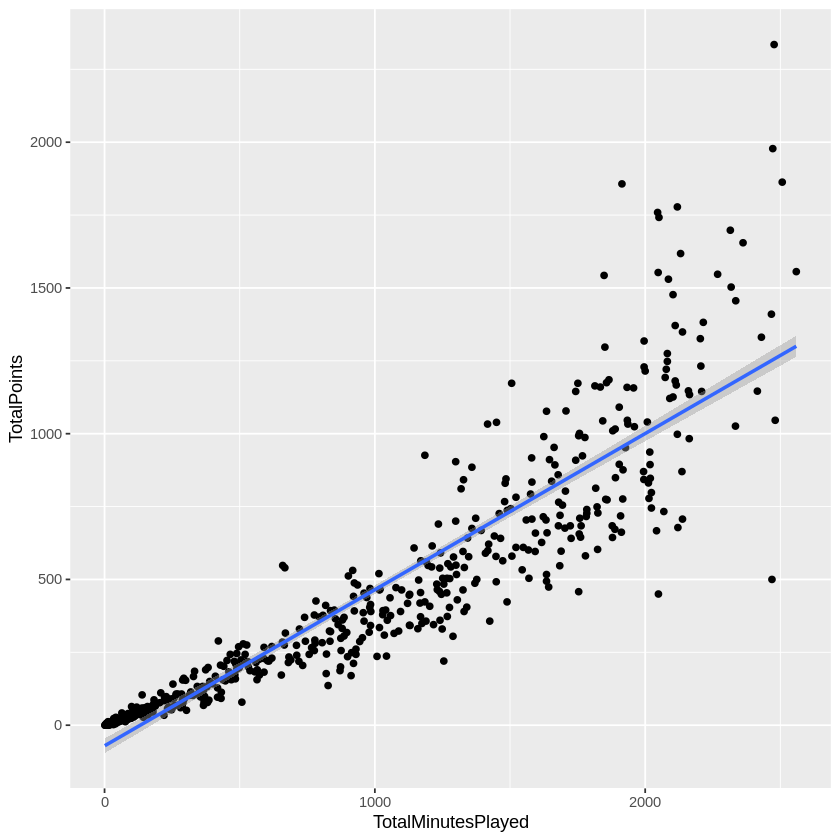

In [12]:
NBA1920<-fetch_NBAPlayerStatistics("19-20")
ggplot(NBA1920,aes(x=TotalMinutesPlayed,y=TotalPoints))+geom_point()+geom_smooth(method = "glm")
lm(TotalPoints~TotalMinutesPlayed,data =NBA1920)

In [13]:
glm(TotalPoints~TotalMinutesPlayed+FieldGoalsAttempted,data =NBA1920)


Call:  glm(formula = TotalPoints ~ TotalMinutesPlayed + FieldGoalsAttempted, 
    data = NBA1920)

Coefficients:
        (Intercept)   TotalMinutesPlayed  FieldGoalsAttempted  
           -11.3738              -0.0117               1.3224  

Degrees of Freedom: 528 Total (i.e. Null);  526 Residual
Null Deviance:	    96030000 
Residual Deviance: 1992000 	AIC: 5865

In [14]:
glm(TotalPoints~TotalMinutesPlayed+FieldGoalsAttempted+Position,
    data =NBA1920)


Call:  glm(formula = TotalPoints ~ TotalMinutesPlayed + FieldGoalsAttempted + 
    Position, data = NBA1920)

Coefficients:
        (Intercept)   TotalMinutesPlayed  FieldGoalsAttempted  
           23.63957             -0.02072              1.34615  
         PositionPF           PositionPG           PositionSF  
          -21.34247            -52.67148            -39.72243  
         PositionSG  
          -50.92796  

Degrees of Freedom: 528 Total (i.e. Null);  522 Residual
Null Deviance:	    96030000 
Residual Deviance: 1809000 	AIC: 5822

In [15]:
mydata <- read.csv("https://raw.githubusercontent.com/CGUIM-BigDataAnalysis/BigDataCGUIM/master/binary.csv")

In [16]:
head(mydata)

,admit,gre,gpa,rank
,<int>,<int>,<dbl>,<int>
1,0,380,3.61,3
2,1,660,3.67,3
3,1,800,4.00,1
4,1,640,3.19,4
5,0,520,2.93,4
6,1,760,3.00,2


In [17]:
mydata$rank <- factor(mydata$rank)
mylogit <- glm(admit ~ gre + gpa + rank, data = mydata, family = "binomial")
sum<-summary(mylogit)
sum$coefficients

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),-3.989979073,1.139950936,-3.500132,0.0004650273
gre,0.002264426,0.001093998,2.069864,0.0384651284
gpa,0.804037549,0.331819298,2.423119,0.0153878974
rank2,-0.675442928,0.316489661,-2.134171,0.0328288188
rank3,-1.340203916,0.345306418,-3.881202,0.0001039415
rank4,-1.551463677,0.417831633,-3.713131,0.0002047107


In [18]:
install.packages("rpart")
library(rpart)
DT <- rpart(Position~Blocks+ThreesMade+Assists+Steals, data=NBA1920)
DT

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



n= 529 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

  1) root 529 413 SF (0.16 0.2 0.21 0.22 0.21)  
    2) Blocks>=34.5 94  49 C (0.48 0.3 0.032 0.15 0.043)  
      4) ThreesMade< 22.5 35   6 C (0.83 0.17 0 0 0) *
      5) ThreesMade>=22.5 59  37 PF (0.27 0.37 0.051 0.24 0.068)  
       10) Steals< 52.5 33  18 PF (0.42 0.45 0.03 0.061 0.03)  
         20) Blocks>=41.5 24  11 C (0.54 0.33 0.042 0.083 0) *
         21) Blocks< 41.5 9   2 PF (0.11 0.78 0 0 0.11) *
       11) Steals>=52.5 26  14 SF (0.077 0.27 0.077 0.46 0.12) *
    3) Blocks< 34.5 435 326 PG (0.09 0.18 0.25 0.23 0.24)  
      6) Assists>=217 53  14 PG (0.019 0.019 0.74 0.075 0.15) *
      7) Assists< 217 382 284 SF (0.099 0.21 0.18 0.26 0.25)  
       14) ThreesMade< 4.5 119  84 PF (0.19 0.29 0.16 0.17 0.18) *
       15) ThreesMade>=4.5 263 185 SF (0.057 0.17 0.19 0.3 0.29)  
         30) Blocks>=10.5 118  79 SF (0.093 0.24 0.068 0.33 0.27)  
           60) Steals< 45.5 70  47 PF (0.14 0.33 0.043

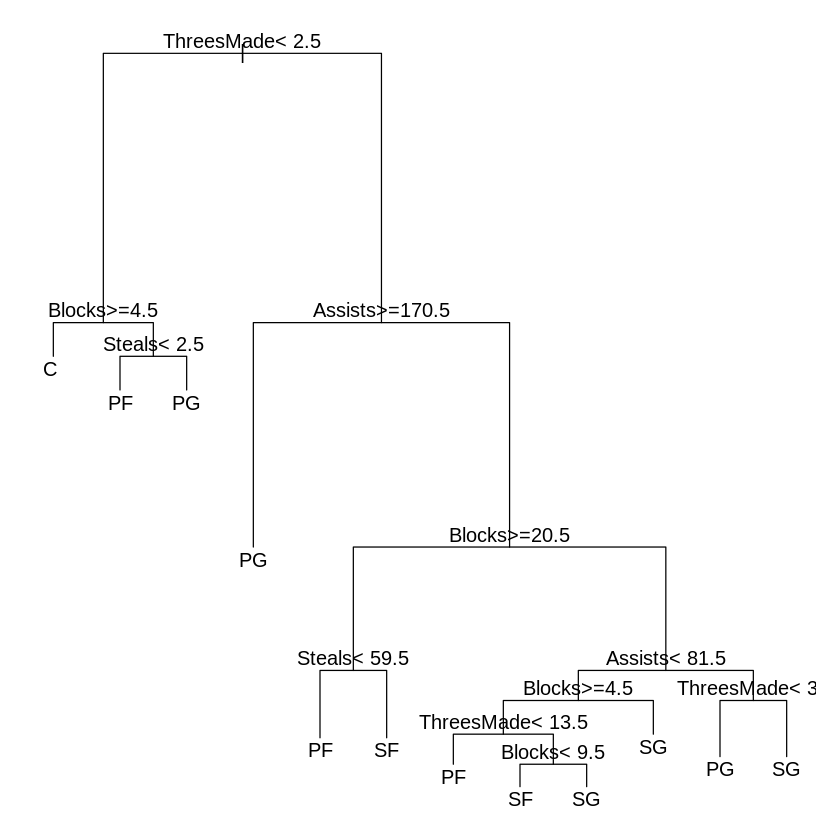

In [ ]:
par(mfrow=c(1,1), mar = rep(1,4)) #下,左,上,右
plot(DT)
text(DT, use.n=F, all=F, cex=1)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



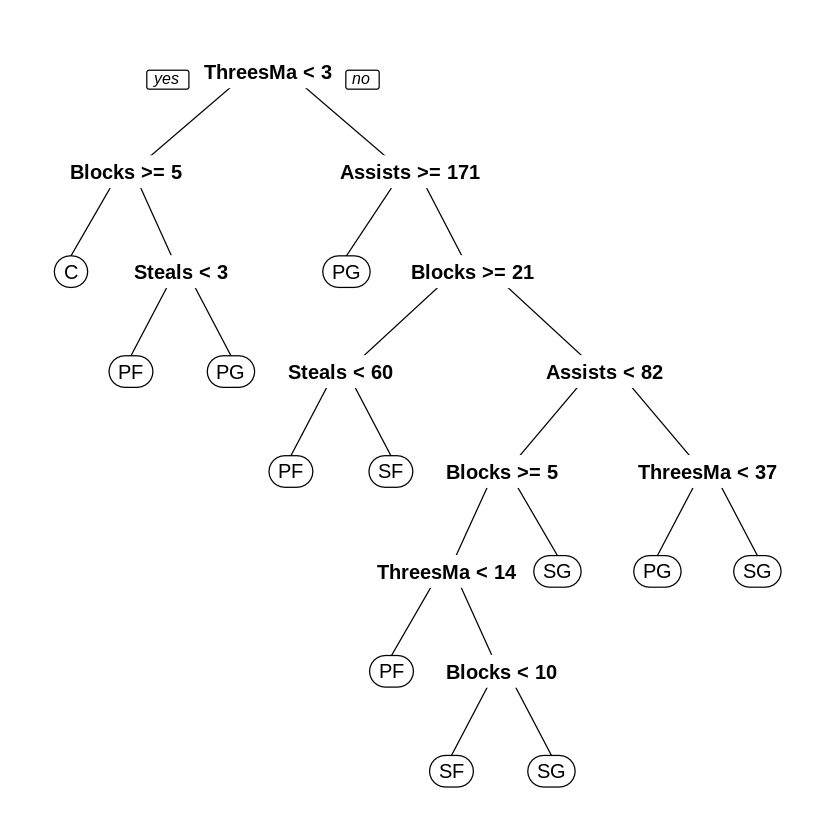

In [ ]:
install.packages("rpart.plot")

library(rpart.plot)
prp(DT)	

In [29]:
install.packages("arules")
library(arules)

install.packages("datasets")
library(datasets) 
data(Groceries)
Groceries@data@Dim 

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: Matrix


Attaching package: ‘arules’


The following objects are masked from ‘package:base’:

    abbreviate, write


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘datasets’ is a base package, and should not be updated”


[1]  169 9835

In [30]:
rules <- apriori(Groceries, 
          parameter = list(supp = 0.001, conf = 0.8), 
          control = list(verbose=F)) 
options(digits=2) 
inspect(rules[1:5]) 

    lhs                        rhs            support confidence coverage lift
[1] {liquor,red/blush wine} => {bottled beer} 0.0019  0.90       0.0021   11.2
[2] {curd,cereals}          => {whole milk}   0.0010  0.91       0.0011    3.6
[3] {yogurt,cereals}        => {whole milk}   0.0017  0.81       0.0021    3.2
[4] {butter,jam}            => {whole milk}   0.0010  0.83       0.0012    3.3
[5] {soups,bottled beer}    => {whole milk}   0.0011  0.92       0.0012    3.6
    count
[1] 19   
[2] 10   
[3] 17   
[4] 10   
[5] 11   


In [31]:
rules<-sort(rules, by="confidence", decreasing=TRUE) 
inspect(rules[1:5]) 

    lhs                     rhs          support confidence coverage lift count
[1] {rice,                                                                     
     sugar}              => {whole milk}  0.0012          1   0.0012  3.9    12
[2] {canned fish,                                                              
     hygiene articles}   => {whole milk}  0.0011          1   0.0011  3.9    11
[3] {root vegetables,                                                          
     butter,                                                                   
     rice}               => {whole milk}  0.0010          1   0.0010  3.9    10
[4] {root vegetables,                                                          
     whipped/sour cream,                                                       
     flour}              => {whole milk}  0.0017          1   0.0017  3.9    17
[5] {butter,                                                                   
     soft cheese,                       

In [32]:
rulesR<-apriori(data=Groceries, parameter=list(supp=0.001,conf = 0.08),
        appearance = list(default="lhs",rhs="whole milk"), 
        control = list(verbose=F)) 
rulesR<-sort(rulesR, decreasing=TRUE,by="confidence") 
inspect(rulesR[1:5]) 

    lhs                     rhs          support confidence coverage lift count
[1] {rice,                                                                     
     sugar}              => {whole milk}  0.0012          1   0.0012  3.9    12
[2] {canned fish,                                                              
     hygiene articles}   => {whole milk}  0.0011          1   0.0011  3.9    11
[3] {root vegetables,                                                          
     butter,                                                                   
     rice}               => {whole milk}  0.0010          1   0.0010  3.9    10
[4] {root vegetables,                                                          
     whipped/sour cream,                                                       
     flour}              => {whole milk}  0.0017          1   0.0017  3.9    17
[5] {butter,                                                                   
     soft cheese,                       

In [33]:
rulesL<-apriori(data=Groceries, parameter=list(supp=0.001,conf = 0.15,minlen=2),
        appearance = list(default="rhs",lhs="whole milk"), 
        control = list(verbose=F)) 
rulesL<-sort(rulesL, decreasing=TRUE,by="confidence") 
inspect(rulesL[1:5]) 

    lhs             rhs                support confidence coverage lift count
[1] {whole milk} => {other vegetables} 0.075   0.29       0.26     1.5  736  
[2] {whole milk} => {rolls/buns}       0.057   0.22       0.26     1.2  557  
[3] {whole milk} => {yogurt}           0.056   0.22       0.26     1.6  551  
[4] {whole milk} => {root vegetables}  0.049   0.19       0.26     1.8  481  
[5] {whole milk} => {tropical fruit}   0.042   0.17       0.26     1.6  416  


In [34]:
rulesL<-apriori(data=Groceries, parameter=list(supp=0.001,conf = 0.15,minlen=2),
        appearance = list(default="rhs",lhs="tropical fruit"), 
        control = list(verbose=F)) 
rulesL<-sort(rulesL, decreasing=TRUE,by="confidence") 
inspect(rulesL[1:5]) 

    lhs                 rhs                support confidence coverage lift
[1] {tropical fruit} => {whole milk}       0.042   0.40       0.1      1.6 
[2] {tropical fruit} => {other vegetables} 0.036   0.34       0.1      1.8 
[3] {tropical fruit} => {yogurt}           0.029   0.28       0.1      2.0 
[4] {tropical fruit} => {rolls/buns}       0.025   0.23       0.1      1.3 
[5] {tropical fruit} => {root vegetables}  0.021   0.20       0.1      1.8 
    count
[1] 416  
[2] 353  
[3] 288  
[4] 242  
[5] 207  


In [35]:
rulesL<-apriori(data=Groceries, parameter=list(supp=0.001,conf = 0.15,minlen=2),
        appearance = list(default="lhs",rhs="whole milk"), 
        control = list(verbose=F)) 
rulesL<-sort(rulesL, decreasing=TRUE,by="confidence") 
inspect(rulesL[1:5]) 

    lhs                     rhs          support confidence coverage lift count
[1] {rice,                                                                     
     sugar}              => {whole milk}  0.0012          1   0.0012  3.9    12
[2] {canned fish,                                                              
     hygiene articles}   => {whole milk}  0.0011          1   0.0011  3.9    11
[3] {root vegetables,                                                          
     butter,                                                                   
     rice}               => {whole milk}  0.0010          1   0.0010  3.9    10
[4] {root vegetables,                                                          
     whipped/sour cream,                                                       
     flour}              => {whole milk}  0.0017          1   0.0017  3.9    17
[5] {butter,                                                                   
     soft cheese,                       

In [36]:
rulesL<-apriori(data=Groceries, parameter=list(supp=0.001,conf = 0.15,minlen=2),
        appearance = list(default="rhs",lhs="bottled beer"), 
        control = list(verbose=F)) 
rulesL<-sort(rulesL, decreasing=TRUE,by="confidence") 
inspect(rulesL[1:5]) 

    lhs               rhs                support confidence coverage lift count
[1] {bottled beer} => {whole milk}       0.020   0.25       0.081    0.99 201  
[2] {bottled beer} => {soda}             0.017   0.21       0.081    1.21 167  
[3] {bottled beer} => {other vegetables} 0.016   0.20       0.081    1.04 159  
[4] {bottled beer} => {bottled water}    0.016   0.20       0.081    1.77 155  
[5] {bottled beer} => {rolls/buns}       0.014   0.17       0.081    0.92 134  


In [37]:
rulesL<-apriori(data=Groceries, parameter=list(supp=0.001,conf = 0.15,minlen=2),
        appearance = list(default="rhs",lhs="root vegetables"), 
        control = list(verbose=F)) 
rulesL<-sort(rulesL, decreasing=TRUE,by="confidence") 
inspect(rulesL[1:5]) 

    lhs                  rhs                support confidence coverage lift
[1] {root vegetables} => {whole milk}       0.049   0.45       0.11     1.8 
[2] {root vegetables} => {other vegetables} 0.047   0.43       0.11     2.2 
[3] {root vegetables} => {yogurt}           0.026   0.24       0.11     1.7 
[4] {root vegetables} => {rolls/buns}       0.024   0.22       0.11     1.2 
[5] {root vegetables} => {tropical fruit}   0.021   0.19       0.11     1.8 
    count
[1] 481  
[2] 466  
[3] 254  
[4] 239  
[5] 207  


In [38]:
rulesL<-apriori(data=Groceries, parameter=list(supp=0.001,conf = 0.15,minlen=2),
        appearance = list(default="rhs",lhs="yogurt"), 
        control = list(verbose=F)) 
rulesL<-sort(rulesL, decreasing=TRUE,by="confidence") 
inspect(rulesL[1:5]) 

    lhs         rhs                support confidence coverage lift count
[1] {yogurt} => {whole milk}       0.056   0.40       0.14     1.6  551  
[2] {yogurt} => {other vegetables} 0.043   0.31       0.14     1.6  427  
[3] {yogurt} => {rolls/buns}       0.034   0.25       0.14     1.3  338  
[4] {yogurt} => {tropical fruit}   0.029   0.21       0.14     2.0  288  
[5] {yogurt} => {soda}             0.027   0.20       0.14     1.1  269  


In [39]:
rulesL<-apriori(data=Groceries, parameter=list(supp=0.001,conf = 0.15,minlen=2),
        appearance = list(default="lhs",rhs="soda"), 
        control = list(verbose=F)) 
rulesL<-sort(rulesL, decreasing=TRUE,by="confidence") 
inspect(rulesL[1:5]) 

    lhs                                             rhs    support confidence
[1] {coffee,misc. beverages}                     => {soda} 0.0010  0.77      
[2] {yogurt,rolls/buns,bottled water,newspapers} => {soda} 0.0010  0.77      
[3] {sausage,bottled water,bottled beer}         => {soda} 0.0011  0.73      
[4] {sausage,white bread,shopping bags}          => {soda} 0.0010  0.67      
[5] {rolls/buns,bottled water,chocolate}         => {soda} 0.0013  0.65      
    coverage lift count
[1] 0.0013   4.4  10   
[2] 0.0013   4.4  10   
[3] 0.0015   4.2  11   
[4] 0.0015   3.8  10   
[5] 0.0020   3.7  13   
